In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mltools import plot_data, plot_frontiere, make_grid, gen_arti
from loss import MSELoss,CELoss,BCE
from module import Linear,Sequentiel,Optim,SGD
from fonction_activation import TanH,Sigmoide
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder


In [3]:
digits=datasets.load_digits()

10


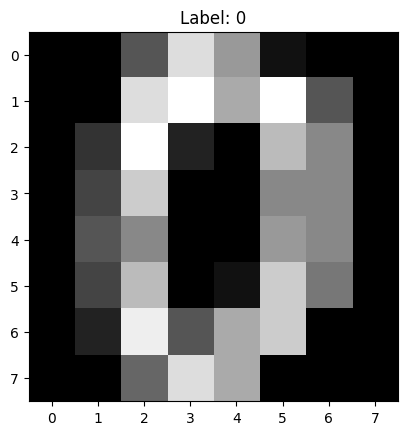

In [4]:
X = digits.images
y = digits.target

print(len(digits.target_names))

plt.imshow(X[0], cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

In [ ]:
X_vect = X.reshape((X.shape[0], -1))
# Normalisation pour avoir valeur entre 0 et 1 et vu qu'on a 16 niveau de gris 
X_vect = X_vect / 16.0  
print(X_vect.shape)

In [ ]:
y_onehot = np.zeros((y.size,len(digits.target_names)))
y_onehot[np.arange(y.size), y] = 1
print(y_onehot.shape)

In [ ]:
#PREMIER TEST
net = Sequentiel(
    CELoss(),
    Linear(64,100),  
    TanH(),                    
    Linear(100, 100),
    TanH(),
    Linear(100, 10)
)

# SGD
train_loss, test_loss,X_test,y_test = SGD(
    net=net,
    loss=CELoss(),
    X=X_vect,
    Y=y_onehot,
    batch_size=16,
    epochs=100,
    eps=0.01 
)

# plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss', linestyle='--')
plt.title("Courbe de loss"); plt.xlabel("Epochs"); plt.legend()


y_pred_logits = net.forward(X_test)
y_pred = np.argmax(y_pred_logits, axis=1)
y_true = np.argmax(y_test, axis=1)  # si Y est one-hot

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\n=== Scores sur le jeu de test ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")


plt.subplot(1, 2, 2)
y_true_classes = np.argmax(y_test, axis=1)
plt.scatter(range(len(y_true_classes)), y_true_classes, label='Vrai label', s=10)
plt.scatter(range(len(y_pred)), y_pred, label='Prédiction', s=10, alpha=0.5)
plt.title("Comparaison prédictions vs vraies classes"); plt.legend()

plt.show()

In [ ]:
print(y_true_classes[0])
print(y_pred[0])
plt.imshow(X_test[0].reshape((8,8)), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

In [ ]:


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion")
plt.show()

# MNIST

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.values/ 255.0  # normalisation
y = mnist.target.astype(int)  #
y = mnist.target.astype(int)
y_onehot = np.zeros((y.size, 10))  # 10 classes (chiffres 0 à 9)
y_onehot[np.arange(y.size), y] = 1

# Découper en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [ ]:
plt.imshow(X_train[0].reshape((28,28)),interpolation="nearest")

In [ ]:
net = Sequentiel(
    CELoss(),
    Linear(784, 100),
    TanH(),
    Linear(100, 100),
    TanH(),
    Linear(100, 10)  # 10 classes
)

train_loss, test_loss, X_eval, y_eval = SGD(
    net=net,
    loss=CELoss(),
    X=X_train,
    Y=y_train,
    batch_size=32,
    epochs=100,
    eps=0.01
)

y_pred_logits = net.forward(X_test)
y_pred = np.argmax(y_pred_logits, axis=1)
y_true = np.argmax(y_test, axis=1)

# Scores
print("Accuracy:", accuracy_score(y_true, y_pred))

In [ ]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)

print("\n=== Scores sur le jeu de test ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")

# Prédictions (par exemple sur le test set)
plt.subplot(1, 2, 2)
# y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
plt.scatter(range(len(y_true_classes)), y_true_classes, label='Vrai label', s=10)
plt.scatter(range(len(y_pred)), y_pred, label='Prédiction', s=10, alpha=0.5)
plt.title("Comparaison prédictions vs vraies classes"); plt.legend()

In [ ]:
# 4. Visualisation
plt.figure(figsize=(12, 5))

# Courbe d'apprentissage
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss', linestyle='--')
plt.title("Courbe de loss"); plt.xlabel("Epochs"); plt.legend()

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion")
plt.show()

différentes dimensions des couches cachées

In [ ]:
train_losses=[]
test_losses=[]
for dim in [10,50,100,200,256]:
  print(f"dim = {dim}")
  net = Sequentiel(CELoss(),Linear(784, dim),TanH(),Linear(dim, dim),TanH(),Linear(dim, 10))  # 10 classes

  train_loss, test_loss, X_eval, y_eval = SGD(net=net,loss=CELoss(),X=X_train,Y=y_train,batch_size=32,epochs=100,eps=0.01)
  train_losses.append(train_loss)
  test_losses.append(test_loss)
  y_pred_logits = net.forward(X_test)
  y_pred = np.argmax(y_pred_logits, axis=1)
  y_true = np.argmax(y_test, axis=1)

  # Scores
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
  rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
  f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
  print("Accuracy:", accuracy_score(y_true, y_pred))
  print(f"Precision: {prec:.4f}")
  print(f"Recall:    {rec:.4f}")
  print(f"F1-score:  {f1:.4f}")

In [ ]:
dims=[10,50,100,200,256]
plt.figure(figsize=(12, 8))
for dim,loss_train in zip(dims,train_losses):
  # Courbe d'apprentissage
  plt.subplot(1, 2, 1)
  plt.plot(loss_train, label=f'Train loss pour {dim}')

plt.title("Courbe de loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
dims=[10,50,100,200,256]
plt.figure(figsize=(12, 8))
for dim,loss_test in zip(dims,test_losses):
  # Courbe d'apprentissage
  plt.subplot(1, 2, 1)
  plt.plot(loss_test, label=f'test loss pour {dim}')

plt.title("Courbe de loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## différentes batch_size

In [ ]:
train_losses=[]
test_losses=[]
for batch_size in [10,32,64,100]:
  print(f"batch_size = {batch_size}")
  net = Sequentiel(CELoss(),Linear(784, 100),TanH(),Linear(100, 10))  # 10 classes

  train_loss, test_loss, X_eval, y_eval = SGD(net=net,loss=CELoss(),X=X_train,Y=y_train,batch_size=batch_size,epochs=100,eps=0.01)
  train_losses.append(train_loss)
  test_losses.append(test_loss)
  y_pred_logits = net.forward(X_test)
  y_pred = np.argmax(y_pred_logits, axis=1)
  y_true = np.argmax(y_test, axis=1)

  # Scores
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
  rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
  f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
  print("Accuracy:", accuracy_score(y_true, y_pred))
  print(f"Precision: {prec:.4f}")
  print(f"Recall:    {rec:.4f}")
  print(f"F1-score:  {f1:.4f}")


In [ ]:
batch_size=[10,32,64,100]
plt.figure(figsize=(12, 8))
for dim,loss_train in zip(batch_size,train_losses):
  # Courbe d'apprentissage
  plt.subplot(1, 2, 1)
  plt.plot(loss_train, label=f'train loss pour {dim}')

plt.title("Courbe de loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
batch_size=[10,32,64,100]
plt.figure(figsize=(12, 8))
for dim,loss_test in zip(batch_size,test_losses):
  # Courbe d'apprentissage
  plt.subplot(1, 2, 1)
  plt.plot(loss_test, label=f'test loss pour {dim}')

plt.title("Courbe de loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## différentes architectures

In [ ]:
train_losses=[]
test_losses=[]
architectures = {
    "une couche": [Linear(784, 100), TanH(), Linear(100, 10)],
    "2 couches": [Linear(784, 100), TanH(), Linear(100, 100), TanH(), Linear(100, 10)],
    "3 couches": [Linear(784, 100), TanH(), Linear(100, 100), TanH(), Linear(100, 100), TanH(), Linear(100, 10)]
}

for name, layers in architectures.items():
    print(f"\nArchitecture: {name}")
    net = Sequentiel(CELoss(), *layers)

    train_loss, test_loss, X_eval, y_eval = SGD(net=net, loss=CELoss(), X=X_train, Y=y_train,
                                                 batch_size=32, epochs=100, eps=0.01)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    y_pred_logits = net.forward(X_test)
    y_pred = np.argmax(y_pred_logits, axis=1)
    y_true = np.argmax(y_test, axis=1)

    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

In [ ]:
plt.figure(figsize=(12, 8))
for dim,loss_train in zip(architectures.keys(),train_losses):
  # Courbe d'apprentissage
  plt.subplot(1, 2, 1)
  plt.plot(loss_train, label=f'test loss pour {dim}')

plt.title("Courbe de loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
for dim,loss_test in zip(architectures.keys(),test_losses):
  # Courbe d'apprentissage
  plt.subplot(1, 2, 1)
  plt.plot(loss_test, label=f'test loss pour {dim}')

plt.title("Courbe de loss")
plt.xlabel("Epochs")
plt.legend()

plt.show()